# Looking at & Investigating Individual Units From UMAP Cluster Plot
There were 2 units that didn't belong to the putative interneuron cluster, but was plotted in the same space, so this Notebook was used to investigate those

In [2]:
import pickle

# Load the umap_df DataFrame from the pickle file
with open(r"umap_df_detail.pkl", "rb") as input_file:
    umap_df = pickle.load(input_file)

In [3]:
umap_df

,x,y,waveform,cluster_id,cluster_color,firing_rate,recording_name,unit_id
0,11.248573,6.791057,"[0.1099006, 0.116567135, 0.12440342, 0.1342621...",1,"[0.27628, 0.42118, 0.89123, 1.0]",4.813648,20240320_142408_alone_comp_subj_3-3_t5b5_merge...,45.0
1,5.551869,4.122543,"[0.068219796, 0.072843686, 0.07739481, 0.08312...",6,"[0.9836, 0.49291, 0.12849, 1.0]",0.820515,20240320_142408_alone_comp_subj_3-3_t5b5_merge...,60.0
2,9.126484,7.641352,"[0.09019028, 0.09590861, 0.10189682, 0.1097604...",8,"[0.4796, 0.01583, 0.01055, 1.0]",0.843159,20240320_142408_alone_comp_subj_3-3_t5b5_merge...,67.0
3,7.472486,5.198098,"[0.084707275, 0.09079722, 0.095418565, 0.10189...",6,"[0.9836, 0.49291, 0.12849, 1.0]",1.958041,20240320_142408_alone_comp_subj_3-3_t5b5_merge...,109.0
4,10.141986,3.313428,"[0.060261134, 0.06250456, 0.064926274, 0.06951...",4,"[0.64362, 0.98999, 0.23356, 1.0]",7.644411,20240320_142408_alone_comp_subj_3-3_t5b5_merge...,124.0
...,...,...,...,...,...,...,...,...
791,8.869656,6.039047,"[0.07405428, 0.0764709, 0.07967044, 0.08752488...",2,"[0.15844, 0.73551, 0.92305, 1.0]",2.699976,20230630_115506_standard_comp_to_novel_agent_D...,81.0
792,10.882633,2.277107,"[0.041631382, 0.04419205, 0.04751358, 0.053183...",4,"[0.64362, 0.98999, 0.23356, 1.0]",0.924106,20230630_115506_standard_comp_to_novel_agent_D...,85.0
793,-0.012175,6.503714,"[0.029774921, 0.033257775, 0.03779468, 0.04383...",5,"[0.93301, 0.81236, 0.22667, 1.0]",0.538478,20230630_115506_standard_comp_to_novel_agent_D...,87.0
794,10.179687,5.521237,"[0.08496837, 0.09056025, 0.09731252, 0.1046718...",1,"[0.27628, 0.42118, 0.89123, 1.0]",0.653116,20230630_115506_standard_comp_to_novel_agent_D...,89.0


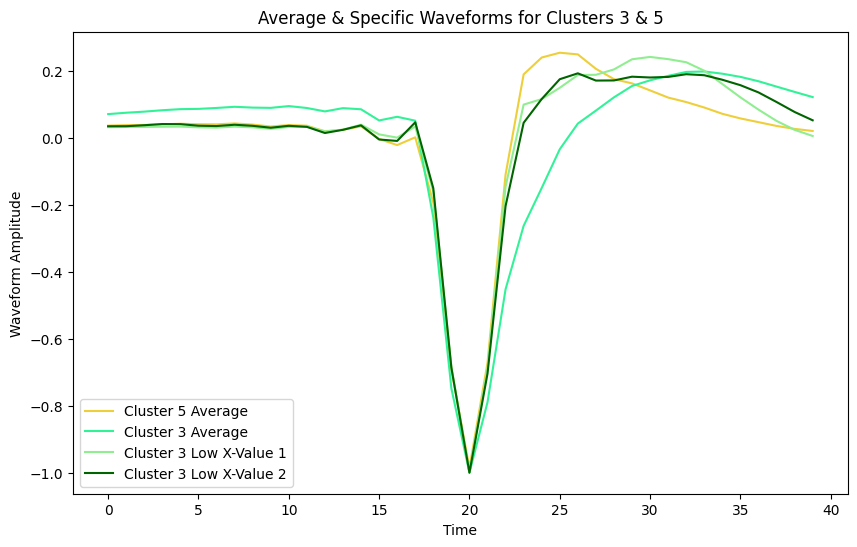

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extracting data for the required clusters
cluster_5 = umap_df[umap_df['cluster_id'] == 5]
cluster_3 = umap_df[umap_df['cluster_id'] == 3]
cluster_3_sorted = cluster_3.sort_values(by='x')

# Average waveforms for clusters 5 and 3
avg_waveform_5 = np.mean(cluster_5['waveform'].tolist(), axis=0)
avg_waveform_3 = np.mean(cluster_3['waveform'].tolist(), axis=0)

# Specific waveforms from cluster 3 with the lowest x values
low_x_waveform_1 = cluster_3_sorted.iloc[0]['waveform']
low_x_waveform_2 = cluster_3_sorted.iloc[1]['waveform']

# Plotting
plt.figure(figsize=(10, 6))

# Plot average waveforms
plt.plot(avg_waveform_5, label='Cluster 5 Average', color=cluster_5.iloc[0]['cluster_color'][:3])
plt.plot(avg_waveform_3, label='Cluster 3 Average', color=cluster_3.iloc[0]['cluster_color'][:3])

# Plot specific waveforms from cluster 3 with variations in color
plt.plot(low_x_waveform_1, label='Cluster 3 Low X-Value 1', color='lightgreen')
plt.plot(low_x_waveform_2, label='Cluster 3 Low X-Value 2', color='darkgreen')

# Labels and title
plt.xlabel('Time')
plt.ylabel('Waveform Amplitude')
plt.title('Average & Specific Waveforms for Clusters 3 & 5')
plt.legend()
plt.show()

In [9]:
cluster_3_sorted

,x,y,waveform,cluster_id,cluster_color,firing_rate,recording_name,unit_id
308,0.099025,6.144289,"[0.032667805, 0.03337879, 0.033411473, 0.03395...",3,"[0.19659, 0.94901, 0.59466, 1.0]",1.138788,20240320_171038_alone_comp_subj_4-2_t6b6_merge...,56.0
95,0.274257,6.250677,"[0.035334244, 0.035556123, 0.03848424, 0.04205...",3,"[0.19659, 0.94901, 0.59466, 1.0]",0.743224,20240317_172017_long_comp_subj_4-2_t6b6_merged...,156.0
491,2.113726,5.731229,"[0.08956538, 0.09610941, 0.10106209, 0.1061832...",3,"[0.19659, 0.94901, 0.59466, 1.0]",9.422436,20230629_111937_standard_comp_to_novel_agent_D...,24.0
446,2.221385,5.764079,"[0.084834896, 0.0916087, 0.09710143, 0.1031008...",3,"[0.19659, 0.94901, 0.59466, 1.0]",15.238261,20230628_111202_standard_comp_to_novel_agent_D...,20.0
781,2.311900,5.833220,"[0.1026754, 0.10805935, 0.11308797, 0.11755825...",3,"[0.19659, 0.94901, 0.59466, 1.0]",10.228172,20230630_115506_standard_comp_to_novel_agent_D...,44.0
...,...,...,...,...,...,...,...,...
137,6.381402,6.743146,"[0.0902105, 0.09709572, 0.10406175, 0.11164446...",3,"[0.19659, 0.94901, 0.59466, 1.0]",4.160974,20240317_172017_long_comp_subj_4-3_t5b5_merged...,46.0
192,6.456851,6.572864,"[0.0904427, 0.09864724, 0.10976396, 0.11803745...",3,"[0.19659, 0.94901, 0.59466, 1.0]",0.641677,20230616_111904_standard_comp_to_training_D4_s...,128.0
634,6.603536,6.653707,"[0.089860015, 0.096685894, 0.10368015, 0.11171...",3,"[0.19659, 0.94901, 0.59466, 1.0]",7.864697,20240319_160457_long_comp_subj_4-2_t5b5_merged...,58.0
676,6.813667,6.717353,"[0.091113865, 0.100354716, 0.10867769, 0.11434...",3,"[0.19659, 0.94901, 0.59466, 1.0]",0.570744,20230614_114041_standard_comp_to_training_D3_s...,229.0


## Conclusion:
The 2 units that were furthest left have a firing rate of 1.14 & 0.74 which is much lower than the average putative interneuron (cluster 5) which has an average FR of ~13.4. The waveform is vaguely similar to Cluster 5, but not as high of a hyperpolarization